In [1]:
# imports.py
from imports import *
# custom mods
import tidy

In [2]:
import nltk
import pandas as pd
import numpy as np
from env import *

import tweepy as tw 

In [3]:
# Prices df
prices_df=tidy.explore_df()

cached csv


In [52]:
def get_later_tweets(tweet_csv = 'csv/latest_tweets.csv'):

    # https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
    latest_tweets = pd.read_csv(tweet_csv)

    # some values don't have proper date values
    latest_tweets= latest_tweets[latest_tweets.date.str.len()==19]

    # Set index to date
    latest_tweets.index = pd.to_datetime(latest_tweets.date)

    # create date column
    latest_tweets['date_of_tweet'] = latest_tweets.index.date

    # sort index and just use date and text going forward
    latest_tweets = latest_tweets.sort_index()[['date','text']]

    # Join with prices df to get Bitcoin price change for that date
    latest_tweets = latest_tweets.merge(prices_df, how='left',left_on=latest_tweets.index.date, right_on = prices_df.index.date)

    latest_tweets.index = pd.to_datetime(latest_tweets.key_0)

    latest_tweets = latest_tweets[['fwd_log_ret','text']]

    latest_tweets.index.name = ""
    
    return latest_tweets

In [53]:
latest_tweets = get_later_tweets()

/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_4107/2567697836.py:4: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  latest_tweets = pd.read_csv(tweet_csv)
/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_4107/2567697836.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_tweets['date_of_tweet'] = latest_tweets.index.date


In [54]:
latest_tweets

,fwd_log_ret,text
,,
2021-02-05,0.028983,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...
2021-02-05,0.028983,📖 Weekend Read 📖\n\nKeen to learn about #cryp...
2021-02-05,0.028983,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...
2021-02-05,0.028983,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe..."
2021-02-05,0.028983,#reddcoin #rdd @reddcoin to the moon #altcoin ...
...,...,...
2022-05-25,NaN,Is buying a share of $BITO the equivalent of b...
2022-05-25,NaN,Are you actually ?\n\n#btc #bitcoin #cryptotra...
2022-05-25,NaN,#Nano Digital Money for the real world \n\nhtt...


In [34]:
def get_tweets(tweet_csv= 'csv/early_tweets.csv'):
    """ Gets early tweets"""
    
    print("Reading csv...")
    # Read in 16M rows
    tweet_df = pd.read_csv(tweet_csv, nrows = 16000000, on_bad_lines='skip',sep=';')
    
    print("Convert index to datetime")
    # Convert index to timestamp , convert to pd datetime
    tweet_df.index = pd.to_datetime(tweet_df.timestamp)

    # remove rows where text is null
    tweet_df = tweet_df[~tweet_df.text.isna()]

    # Only use tweets from days when we have price data, which starts 2014-09-16
    tweet_df = tweet_df[tweet_df.index>'2014-09-17'].sort_index()

    # Only include tweets that have either been liked or retweeted - gets the numbers down and uses most popular tweets
    small_tweets = tweet_df[(tweet_df.likes>0)|(tweet_df.retweets>0)]
    
    # Creates column just with date of the tweet, for joining with the prices df
    small_tweets['date_of_tweet'] = small_tweets.index.date
    
    # Prices df
    prices_df=tidy.explore_df()
    
    # Join tweet df with prices
    small_tweets = small_tweets.merge(prices_df, how='left',left_on='date_of_tweet', right_on = prices_df.index.date)
    
    # Convert index to datetime
    small_tweets.index = pd.to_datetime(small_tweets.timestamp)
    
    # Remove time component
    small_tweets.index = small_tweets.index.date

    small_tweets = small_tweets[['fwd_log_ret','text']]
    
    return small_tweets

In [35]:
early_tweets = get_tweets()

Reading csv...


/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_4107/1737361517.py:5: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_df = pd.read_csv(tweet_csv, nrows = 16000000, on_bad_lines='skip',sep=';')


Convert index to datetime


/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_4107/1737361517.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_tweets['date_of_tweet'] = small_tweets.index.date


cached csv


In [55]:
early_tweets

,fwd_log_ret,text
2014-09-17,-0.074643,#RDD / #BTC on the exchanges:\nCryptsy: 0.0000...
2014-09-17,-0.074643,現在の価格は 49712円(http://blockchain.info )です。前回比は1...
2014-09-17,-0.074643,"In the last 10 mins, there were arb opps spann..."
2014-09-17,-0.074643,1000+ FaceBook Fan Page Likes $3.00 http://bit...
2014-09-17,-0.074643,LIVE: Profit = $157.56 (1.84 %). BUY B18.52 @ ...
...,...,...
2019-09-18,0.006662,More info : Call/WA/DM https://t.co/rcCBTfvWRR
2019-09-18,0.006662,$15 Apple Products https://t.co/UK6IsnPmuv
2019-09-18,0.006662,おほー https://t.co/872bKeNgHZ
2019-09-18,0.006662,Крипто Биржа https://t.co/xHrhunHrd7


In [36]:
early_tweetstweets = pd.concat([early_tweets,latest_tweets])

In [51]:
all_tweets.index[-1]

Timestamp('2022-05-25 00:00:00')

In [76]:
start_date = '2019-09-18'
final_end_date = '2019-09-20'

In [ ]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
tweets_list2 = []
all_tweets = {}
# Using TwitterSearchScraper to scrape data and append tweets to list
# set initial start and end date for day by day scraping
start_date = '2019-10-01'
end_date = '2019-10-02'
# final_end_date = '2019-09-22'
final_end_date = '2021-02-05'
while start_date < final_end_date:
    print('scraping...',start_date, end_date)
    tweets_list2 = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'#bitcoin since:{start_date} until:{end_date}').get_items()):
        print(i, end = "\r")
        if i>5000:
            break
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
        
    # Add day's tweets to dictionary    
    all_tweets[start_date] = (tweets_list2)
    # increment and change representation of date
    start_date = datetime.datetime.strptime(start_date, '%Y-%M-%d') + datetime.timedelta(days=1)
    start_date = datetime.datetime.strftime(start_date,'%Y-%M-%d')
    end_date = datetime.datetime.strptime(end_date, '%Y-%M-%d') + datetime.timedelta(days=1)
    end_date = datetime.datetime.strftime(end_date,'%Y-%M-%d')
    print(start_date, final_end_date)
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2.index = pd.to_datetime(tweets_df2.Datetime)
tweets_df2 = tweets_df2.sort_index()

scraping... 2019-10-01 2019-10-02


In [144]:
pd.DataFrame(all_tweets['2019-09-21'], columns = ['time','user','text','username'])

,time,user,text,username
0,2019-09-21 23:59:42+00:00,1175560265036902401,The Meaning of Life https://t.co/NK2uYNwtsQ | ...,theautomatski
1,2019-09-21 23:59:17+00:00,1175560159046692865,"下降相場(長い足で)では、売りパターンだけ探せ #fx,#bitcoin",FxgolgoB
2,2019-09-21 23:59:09+00:00,1175560125328678912,📈 Binance Trading Bot Sell Signal\nPair: DNTBT...,coinfather_bot
3,2019-09-21 23:59:06+00:00,1175560112762568704,📈 Binance Trading Bot Sell Signal\nPair: DNTBT...,coinfather_bot
4,2019-09-21 23:59:04+00:00,1175560106441768961,📈 Binance Trading Bot Sell Signal\nPair: DNTBT...,coinfather_bot
...,...,...,...,...
4996,2019-09-21 08:09:45+00:00,1175321201562046464,#orionixtoken #blockchain #ethereum \n#bitco...,ruchira30541190
4997,2019-09-21 08:09:34+00:00,1175321157077069826,This has been years in the making @Bakkt will ...,DeepDishCrypto
4998,2019-09-21 08:09:31+00:00,1175321140799012864,@woonomic @alistairmilne 88% of leading financ...,r1e55y
4999,2019-09-21 08:09:19+00:00,1175321090966470656,88% of leading financial top management believ...,r1e55y


In [150]:
sep_2019 = ['2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30', '2019-09-31']
temp_df = pd.DataFrame()
for key in sep_2019:
    that_day = pd.DataFrame(all_tweets[key], columns = ['time','user','text','username'])
    temp_df = pd.concat([temp_df, that_day])

In [154]:
temp_df.to_csv('csv/sep_2019.csv')

In [23]:
# tweets_df2.to_csv('csv/tweets_june_2020.csv')

In [6]:
df=tidy.explore_df()

cached csv


In [9]:
df.head()

,date,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


<AxesSubplot:>

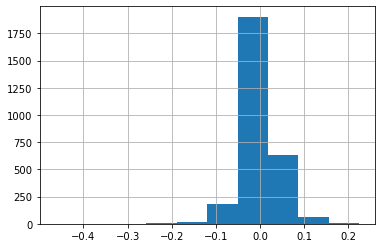

In [8]:
df.fwd_log_ret.hist()

<AxesSubplot:>

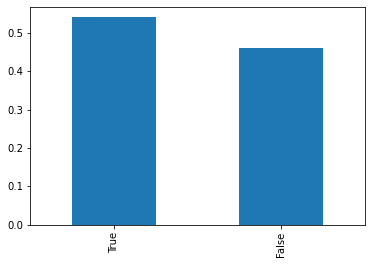

In [15]:
df.fwd_close_positive.value_counts(normalize=True).plot.bar()

In [45]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('btc')\
                                           .setSince("2015-05-01")\
                                           .setUntil("2015-09-30")\
                                           .setMaxTweets(1)

In [47]:
import twint

In [48]:
c = twint.Config()
c.Username = 'donaldtrump'

In [49]:
twint.run.Search(c)

RuntimeError: This event loop is already running

In [46]:
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

An error occured during an HTTP request: HTTP Error 404: Not Found
Try to open in browser: https://twitter.com/search?q=btc%20since%3A2015-05-01%20until%3A2015-09-30&src=typd


AssertionError: 

In [41]:
print(tweet.text)

An error occured during an HTTP request: HTTP Error 404: Not Found
Try to open in browser: https://twitter.com/search?q=europe%20refugees%20since%3A2015-05-01%20until%3A2015-09-30&src=typd


AssertionError: 

In [16]:
auth = tw.OAuth2BearerHandler(bearer_token)
api = tw.API(auth)

In [37]:
search_words = "#btc" #Type you keywork here instead of #covidvaccine
#You can fix a time frame with the date since and date until parameters
date_since = "2014-08-17"
date_until="2014-08-20"
# Collect tweets
tweets = tw.Cursor(api.search_tweets, 
              q=search_words,
              lang="en",
                until = date_since
              ).items(5) #We instruct the cursor to return maximum of 7500 tweets

In [38]:
tweet_content_list = []
tweet_date_list = []
tweeter = []
for tweet in tweets:
    tweet_content_list.append(tweet.text)
    tweet_date_list.append(tweet.created_at)
    tweeter.append(tweet.author.name)

In [39]:
pd.DataFrame({'content':tweet_content_list, 'date': tweet_date_list, 'author':tweeter})

,content,date,author
